In [1]:
cd /Users/pardhu/Desktop/Yashu/projects/leadScoringDemo

/Users/pardhu/Desktop/Yashu/projects/leadScoringDemo


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('Lead Scoring.csv')

In [4]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
data.shape

(9240, 37)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Exploratory Data Analysis

* Univariate Analysis - Single Feature
* Bivariate Analysis - Two Features
* Multivariate Analysis - More than two features

#### Univariate Analysis

In [27]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# Checking Lead Origin 
data['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [10]:
# Checking Lead Source 
data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [11]:
# Checking Do Not Email
data['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [12]:
# Checking Do Not Call
data['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [13]:
# Target Column - Converted
data['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [14]:
# Total Visits
data['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

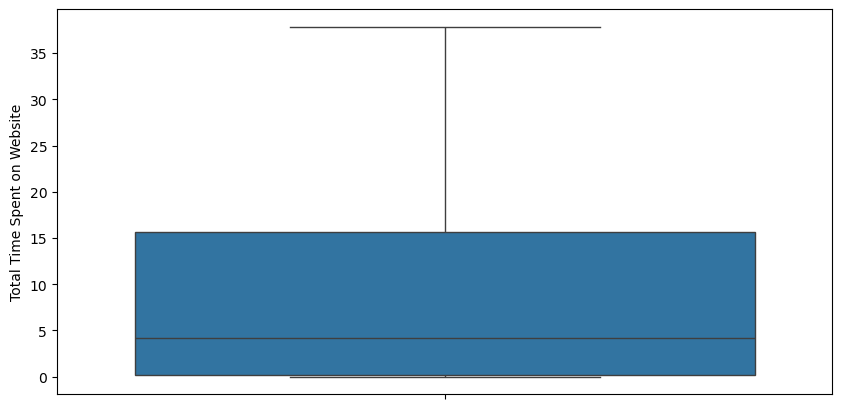

In [20]:
# Checking Lead Source 
plt.figure(figsize = (10,5))
sns.boxplot(data['Total Time Spent on Website']/60)
plt.show()

In [22]:
(data['Total Time Spent on Website']/60).describe()

count    9240.000000
mean        8.128304
std         9.133691
min         0.000000
25%         0.200000
50%         4.133333
75%        15.600000
max        37.866667
Name: Total Time Spent on Website, dtype: float64

In [24]:
# Page Views Per Visit
data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [26]:
# Last Activity
data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [28]:
# Country
data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [29]:
# Specialization
data['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [30]:
# About X Education
data['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [31]:
# What is your current occupation
data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [33]:
# Choosing Course
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [34]:
# user search activity
data['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [35]:
# user Magazine activity
data['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [36]:
# user Newspaper Article activity
data['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [37]:
# user X Education Forums activity
data['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [38]:
# user Newspaper activity
data['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [39]:
# user Digital Advertisement	 activity
data['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [40]:
# user Through Recommendations	
data['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [41]:
# Receive More Updates About Our Courses
data['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [42]:
# note tags
data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [43]:
# Lead Quality	
data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [44]:
# Update me on Supply Chain Content
data['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [45]:
# Get updates on DM Content
data['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [46]:
# Lead Profile
data['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [47]:
# City
data['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [48]:
# Asymmetrique Activity Index
data['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [49]:
# Asymmetrique Activity Index
data['Asymmetrique Activity Score'].value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [51]:
# Asymmetrique Activity Score
data['Asymmetrique Profile Score'].value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [52]:
# Payment type
data['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [54]:
# Payment type
data['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

#### Bivariate Analysis

* Our target feature is Converted

In [58]:
# Checking Lead Origin vs Conversion
pd.crosstab(data['Lead Origin'], data['Converted'])

Converted,0,1
Lead Origin,,
API,2465,1115
Landing Page Submission,3118,1768
Lead Add Form,54,664
Lead Import,42,13
Quick Add Form,0,1


In [59]:
# Checking Lead Source vs Conversion
pd.crosstab(data['Lead Source'], data['Converted'])

Converted,0,1
Lead Source,,
Click2call,1,3
Direct Traffic,1725,818
Facebook,42,13
Google,1721,1147
Live Chat,0,2
NC_EDM,0,1
Olark Chat,1307,448
Organic Search,718,436
Pay per Click Ads,1,0


In [60]:
# Checking Lead Origin vs Conversion
pd.crosstab(data['Do Not Email'], data['Converted'])

Converted,0,1
Do Not Email,,
No,5063,3443
Yes,616,118


In [61]:
# Checking Lead Origin vs Conversion
pd.crosstab(data['TotalVisits'], data['Converted'])

Converted,0,1
TotalVisits,,
0.0,1273,916
1.0,335,60
2.0,1143,537
3.0,820,486
4.0,672,448
5.0,467,316
6.0,288,178
7.0,187,122
8.0,121,103


In [64]:
# Time Spent
data['Total Time Spent on Website (min)'] = data['Total Time Spent on Website'] / 60
data.groupby('Converted')['Total Time Spent on Website (min)'].describe()

,count,mean,std,min,25%,50%,75%,max
Converted,,,,,,,,
0,5679.0,5.506741,7.203865,0.0,0.266667,2.983333,6.550000,37.866667
1,3561.0,12.309113,10.260933,0.0,0.000000,13.866667,21.133333,37.550000


In [65]:
# Last Activity vs Conversion
pd.crosstab(data['Last Activity'], data['Converted'])

Converted,0,1
Last Activity,,
Approached upfront,0,9
Converted to Lead,374,54
Email Bounced,300,26
Email Link Clicked,194,73
Email Marked Spam,0,2
Email Opened,2184,1253
Email Received,0,2
Form Submitted on Website,88,28
Had a Phone Conversation,8,22


In [66]:
# Country vs Conversion
pd.crosstab(data['Country'], data['Converted'])

Converted,0,1
Country,,
Asia/Pacific Region,1,1
Australia,10,3
Bahrain,3,4
Bangladesh,1,1
Belgium,2,0
Canada,4,0
China,2,0
Denmark,0,1
France,3,3


In [67]:
# Specialization vs Conversion
pd.crosstab(data['Specialization'], data['Converted'])

Converted,0,1
Specialization,,
"Banking, Investment And Insurance",171,167
Business Administration,224,179
E-Business,36,21
E-COMMERCE,72,40
Finance Management,540,436
Healthcare Management,80,79
Hospitality Management,66,48
Human Resource Management,460,388
IT Projects Management,226,140


In [68]:
# What is your current occupation vs conversion
pd.crosstab(data['What is your current occupation'], data['Converted'])

Converted,0,1
What is your current occupation,,
Businessman,3,5
Housewife,0,10
Other,6,10
Student,132,78
Unemployed,3159,2441
Working Professional,59,647


In [70]:
# Tags vs conversion
pd.crosstab(data['Tags'], data['Converted'])

Converted,0,1
Tags,,
Already a student,462,3
Busy,81,105
Closed by Horizzon,2,356
Diploma holder (Not Eligible),62,1
Graduation in progress,104,7
In confusion whether part time or DLP,4,1
Interested in full time MBA,114,3
Interested in Next batch,0,5
Interested in other courses,500,13


In [71]:
# Lead Quality vs conversion
pd.crosstab(data['Lead Quality'], data['Converted'])

Converted,0,1
Lead Quality,,
High in Relevance,34,603
Low in Relevance,106,477
Might be,381,1179
Not Sure,826,266
Worst,589,12


In [72]:
# City vs conversion
pd.crosstab(data['City'], data['Converted'])

Converted,0,1
City,,
Mumbai,1913,1309
Other Cities,410,276
Other Cities of Maharashtra,256,201
Other Metro Cities,225,155
Select,1146,1103
Thane & Outskirts,414,338
Tier II Cities,49,25


In [73]:
# Last Notable Activity vs conversion
pd.crosstab(data['Last Notable Activity'], data['Converted'])

Converted,0,1
Last Notable Activity,,
Approached upfront,0,1
Email Bounced,51,9
Email Link Clicked,128,45
Email Marked Spam,0,2
Email Opened,1783,1044
Email Received,0,1
Form Submitted on Website,1,0
Had a Phone Conversation,1,13
Modified,2624,783
